In [7]:
import torch
torch.cuda.is_available()

True

In [8]:
import random
import math
import time
import pandas as pd
import numpy as np
from PIL import Image

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms

In [9]:
# Setup seeds
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [21]:
class Generator(nn.Module):

    def __init__(self, z_dim=20, image_size=64):
        super(Generator, self).__init__()

        self.main = nn.Sequential(
            # layer1
            nn.ConvTranspose2d(z_dim, image_size * 8,
                                kernel_size=4, stride=1), 
            nn.BatchNorm2d(image_size * 8), 
            nn.ReLU(inplace=True), 

            # layer2
            nn.ConvTranspose2d(image_size * 8, image_size * 4,
                                kernel_size=4, stride=2, padding=1), 
            nn.BatchNorm2d(image_size * 4), 
            nn.ReLU(inplace=True), 

            # layer3
            nn.ConvTranspose2d(image_size * 4, image_size * 2, 
                                kernel_size=4, stride=2, padding=1), 
            nn.BatchNorm2d(image_size * 2), 
            nn.ReLU(inplace=True), 

            # layer4
            nn.ConvTranspose2d(image_size * 2, image_size, 
                                kernel_size=4, stride=2, padding=1), 
            nn.BatchNorm2d(image_size), 
            nn.ReLU(inplace=True), 

            # layer last
            nn.ConvTranspose2d(image_size, 1, 
                                kernel_size=4, stride=2, padding=1), 
            nn.Tanh()
        )

    def forward(self, z):
        return self.main(z)


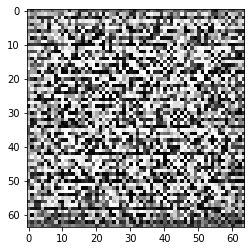

In [30]:
# Generator 動作確認
import matplotlib.pyplot as plt
%matplotlib inline

G = Generator(20, 64)

# 入力する乱数, channel(z_dim)に1個ずつ乱数あげる
input_z = torch.randn(1, 20)
input_z = input_z.view(1, 20, 1, 1)#(N, C, H, W)

# 画像出力
fake_images = G(input_z)

img_transformed = fake_images[0][0].detach().numpy()
plt.imshow(img_transformed, "gray")
plt.show()
# imshowの引数とか https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html